In [60]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import re
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

file_path = '/content/drive/MyDrive/bey data/stock combo data.xlsx'
beyblade_data = pd.read_excel(file_path)
beyblade_data

,Blade,Ratchet,Bit,Type,Spin,Weight,Height,Width,Solo Spin Time,W/L Vs attack,...,W/L Vs balance,avg. battle time,own burst opp,opp burst own,own over opp,opp over own,own out opp,opp out own,own spin opp,opp spin own
0,Dran Sword,3-60,Flat,Attack,Right,43.13g,35.64mm,48.25mm,(31.79 + 31.50 + 32.54 + 34.62 + 33.92) /5,0-3,...,3-3,(6.50 + 19.26 + 9.69 + 23.31 + 16.08 + 6.28 + ...,3.0,0.0,2.0,1.0,5.0,0.0,0.0,8.0
1,Wizard Arrrow,4-80,Ball,Stamina,Right,40.95g,37.97mm,48.09mm,(96.54 + 107.10 +86.21 +94.99 + 96.36) /5,1-5,...,4-2,(6.50 + 19.26 + 9.69 + 22.36 + 14.12 + 5.35 +...,1.0,5.0,2.0,1.0,1.0,7.0,4.0,0.0
2,Knight Shield,3-80,Needle,Defense,Right,41.37g,37.75mm,47.99mm,(132.35 + 132.25 + 132.64 +138.89 + 130.24) /5,3-3,...,2-4,(23.31 + 16.08 + 6.28 + 22.36 + 14.12 + 5.35 +...,1.0,2.0,1.0,3.0,1.0,2.0,7.0,4.0
3,Hells scythe,4-60,Taper,Balance,Right,41.18g,36.15mm,47.99mm,(49.48 + 45.85 + 52.12 + 51.74 + 40.83) /5,3-3,...,2-1,( 9.37 + 7.20 + 16.96 + 2.33 + 18.61 + 5.25 + ...,1.0,1.0,3.0,3.0,2.0,4.0,3.0,2.0
4,Dranzer Spiral,3-80,Taper,Balance,Right,36.57g,37.37mm,48.10mm,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Knight Lance,4-80,High Needle,Defense,Right,42.04g,38.76mm,47.44mm,(124.88 + 114.84 + 109.01 + 113.9 + 108.61) / 5,3-3,...,2-4,(7.82 + 15.12 + 15.37 + 3.38 + 28.37 +28.53 + ...,2.0,1.0,0.0,1.0,1.0,4.0,6.0,6.0
6,Shark Edge,3-60,Low Flat,Attack,Right,42.93g,34.92mm,48.88mm,(40.64 + 33.75 + 43.40 + 38.77 + 39.96) / 5,3-0,...,4-2,(5.80 + 4.87 + 8.15 + 14.04 + 1.80 +1.88 + 8.5...,5.0,0.0,4.0,2.0,2.0,0.0,5.0,3.0
7,Viper Tail,5-80,Orb,Stamina,Right,43.85g,37.69mm,48.35mm,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Leon Claw,5-60,Point,Balance,Right,40.06g,35.59mm,48.34mm,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Rhino Horn,3-80,Spike,Defense,Right,41.07g,37.58mm,45.05mm,(84.09 + 78.26 + 80.80 + 81.50 + 73.36) / 5,0-6,...,3-3,(6.82 + 6.53 + 4.45 +3.93 + 4.40 + 2.97 + 1.75...,2.0,4.0,1.0,2.0,4.0,2.0,1.0,5.0


In [4]:
beyblade_data.dtypes

Blade                object
Ratchet              object
Bit                  object
Type                 object
Spin                 object
Weight               object
Height               object
Width                object
Solo Spin Time       object
W/L Vs attack        object
W/L Vs defense       object
W/L Vs stamina       object
W/L Vs balance       object
avg. battle time     object
own burst opp       float64
opp burst own       float64
own over opp        float64
opp over own        float64
own out opp         float64
opp out own         float64
own spin opp        float64
opp spin own        float64
dtype: object

In [124]:
def calculate_total_wins_losses(row):
    win_columns = ['W/L Vs attack', 'W/L Vs defense', 'W/L Vs stamina', 'W/L Vs balance']
    total_wins = 0
    total_losses = 0

    # Iterate through win columns, parse wins and losses, and sum them
    for col in win_columns:
        wins_losses = str(row[col]).split('-')
        if len(wins_losses) == 2:
            wins, losses = map(int, wins_losses)
            total_wins += wins
            total_losses += losses

    return total_wins, total_losses

def calculate_avg_battle_time(row):
    try:
        # Evaluating the expression within the string and calculating the average
        return eval(row) if row != '' else float('NaN')
    except:
        return float('NaN')

# Create a new column 'Average Battle Time' with the calculated values
beyblade_data['Average Battle Time'] = beyblade_data['avg. battle time'].apply(calculate_avg_battle_time)

# Apply the function row-wise to calculate total wins and losses
beyblade_data[['Total Wins', 'Total Losses']] = beyblade_data.apply(calculate_total_wins_losses, axis=1, result_type='expand')

# creating a new column for win loss ratio
beyblade_data['Win/Loss Ratio'] = np.where(beyblade_data['Total Losses'] != 0, beyblade_data['Total Wins'] / beyblade_data['Total Losses'], np.nan)

beyblade_data['Total Points'] = (2 * beyblade_data['own burst opp']) + \
                                (-2 * beyblade_data['opp burst own']) + \
                                (3 * beyblade_data['own over opp']) + \
                                (-3 * beyblade_data['opp over own']) + \
                                (2 * beyblade_data['own out opp']) + \
                                (-2 * beyblade_data['opp out own']) + \
                                (1 * beyblade_data['own spin opp']) + \
                                (-1 * beyblade_data['opp spin own'])

beyblade_data

<ipython-input-124-4ea1bf36c4cd>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beyblade_data['Average Battle Time'] = beyblade_data['avg. battle time'].apply(calculate_avg_battle_time)
<ipython-input-124-4ea1bf36c4cd>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beyblade_data[['Total Wins', 'Total Losses']] = beyblade_data.apply(calculate_total_wins_losses, axis=1, result_type='expand')
<ipython-input-124-4ea1bf36c4cd>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,Blade,Ratchet,Bit,Type,Spin,Weight,Height,Width,Solo Spin Time,W/L Vs attack,...,own out opp,opp out own,own spin opp,opp spin own,Total Wins,Total Losses,Average Battle Time,Win/Loss Ratio,Average Spin Time,Total Points
0,Dran Sword,3-60,Flat,Attack,Right,43.13g,35.64mm,48.25mm,(31.79 + 31.50 + 32.54 + 34.62 + 33.92) /5,0-3,...,5.0,0.0,0.0,8.0,12,9,10.482857,1.333333,28.23,11.0
1,Wizard Arrrow,4-80,Ball,Stamina,Right,40.95g,37.97mm,48.09mm,(96.54 + 107.10 +86.21 +94.99 + 96.36) /5,1-5,...,1.0,7.0,4.0,0.0,8,13,9.858571,0.615385,81.03,-13.0
2,Knight Shield,3-80,Needle,Defense,Right,41.37g,37.75mm,47.99mm,(132.35 + 132.25 + 132.64 +138.89 + 130.24) /5,3-3,...,1.0,2.0,7.0,4.0,10,11,12.538571,0.909091,111.89,-7.0
3,Hells scythe,4-60,Taper,Balance,Right,41.18g,36.15mm,47.99mm,(49.48 + 45.85 + 52.12 + 51.74 + 40.83) /5,3-3,...,2.0,4.0,3.0,2.0,12,9,8.412381,1.333333,40.84,-3.0
5,Knight Lance,4-80,High Needle,Defense,Right,42.04g,38.76mm,47.44mm,(124.88 + 114.84 + 109.01 + 113.9 + 108.61) / 5,3-3,...,1.0,4.0,6.0,6.0,9,12,13.343333,0.750000,96.04,-7.0
6,Shark Edge,3-60,Low Flat,Attack,Right,42.93g,34.92mm,48.88mm,(40.64 + 33.75 + 43.40 + 38.77 + 39.96) / 5,3-0,...,2.0,0.0,5.0,3.0,15,6,8.257143,2.500000,33.59,22.0
9,Rhino Horn,3-80,Spike,Defense,Right,41.07g,37.58mm,45.05mm,(84.09 + 78.26 + 80.80 + 81.50 + 73.36) / 5,0-6,...,4.0,2.0,1.0,5.0,8,13,7.521429,0.615385,67.17,-7.0
11,Hells Chain,5-60,High Taper,Balance,Right,42.02g,36.22mm,48.13mm,(60.18 + 72.28 + 46.87 + 52.93 + 75.92) /5,2-4,...,5.0,1.0,5.0,4.0,12,9,8.877619,1.333333,52.20,5.0


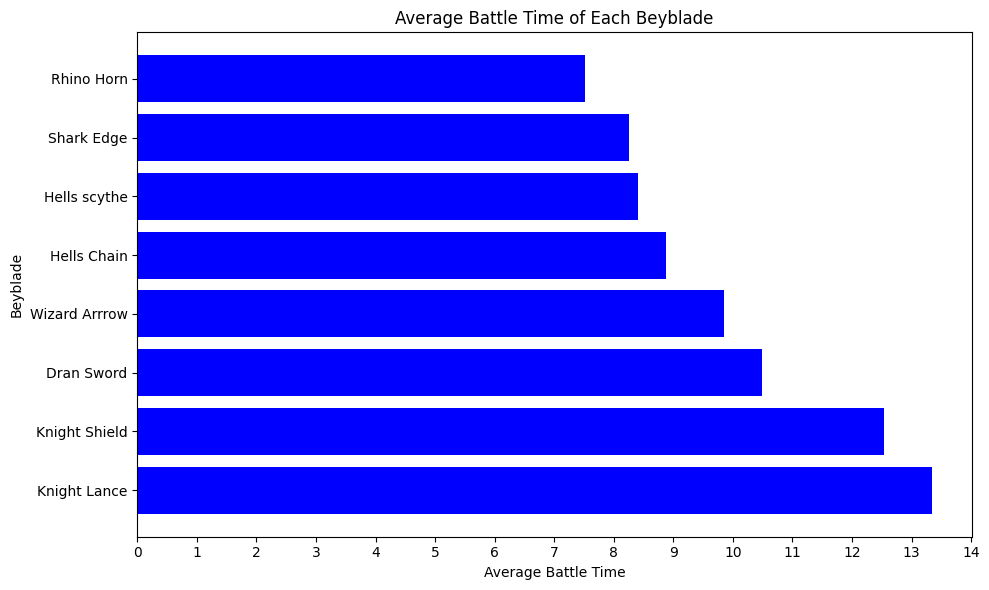

In [120]:

time_data_sorted = beyblade_data.sort_values(by='Average Battle Time', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(time_data_sorted['Blade'], time_data_sorted['Average Battle Time'], color='blue')
plt.xlabel('Average Battle Time')
plt.ylabel('Beyblade')
plt.title('Average Battle Time of Each Beyblade')
plt.xticks(np.arange(0, time_data_sorted['Average Battle Time'].max() + 1, 1))  # Set the step size to 0.5

plt.tight_layout()
plt.show()

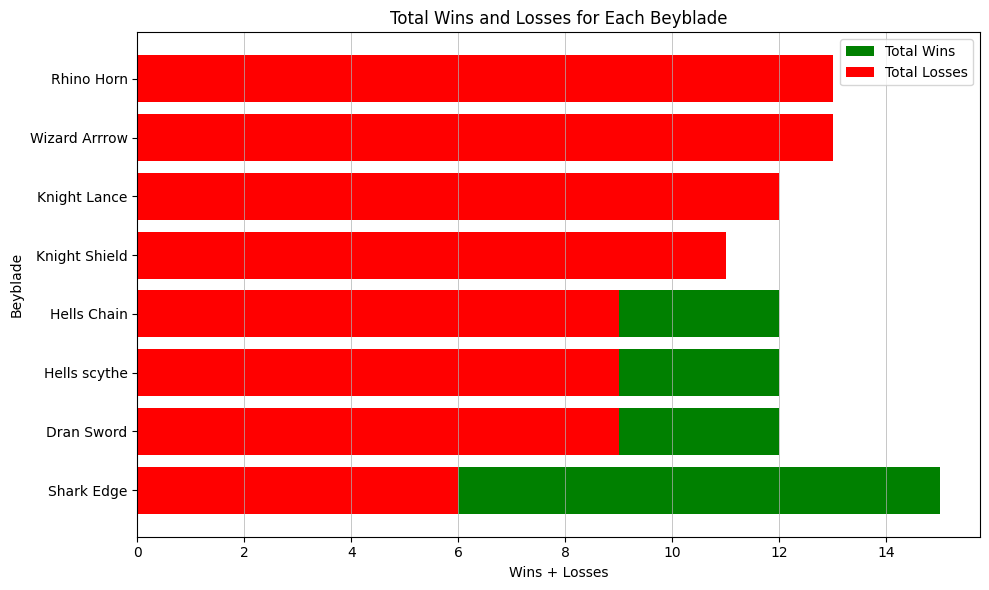

In [122]:

Win_loss_sorted = beyblade_data.sort_values('Total Wins', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(Win_loss_sorted['Blade'], Win_loss_sorted['Total Wins'], label='Total Wins', color='green')
plt.barh(Win_loss_sorted['Blade'], Win_loss_sorted['Total Losses'], label='Total Losses', color='red')
plt.xlabel('Wins + Losses')
plt.ylabel('Beyblade')
plt.title('Total Wins and Losses for Each Beyblade')
plt.legend()
plt.grid(axis='x', linestyle='-', linewidth=0.5)
plt.tight_layout()

plt.show()

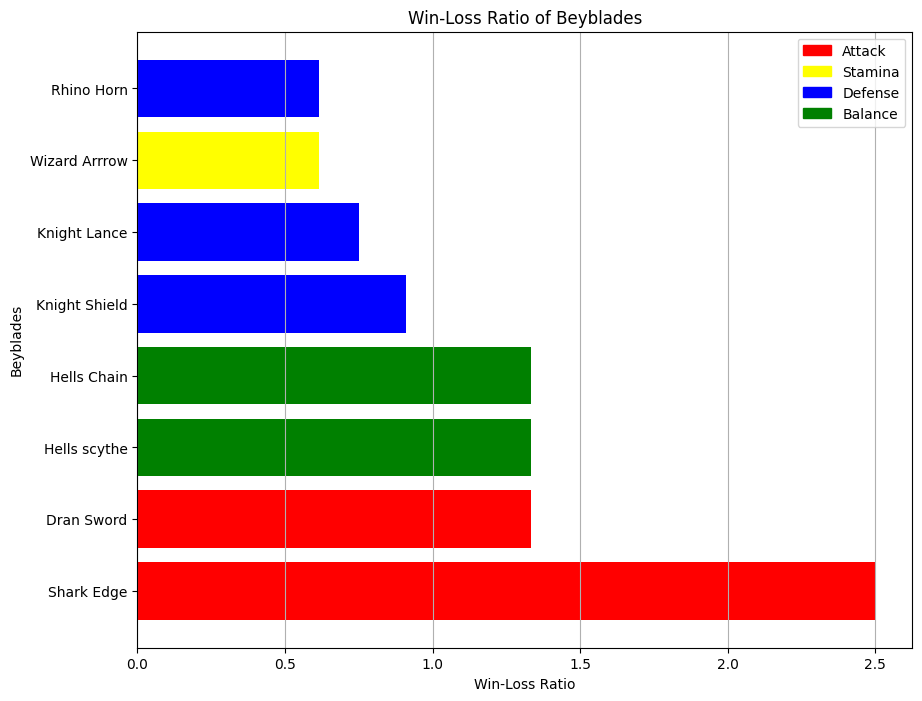

In [149]:
sorted_data = beyblade_data.sort_values('Win/Loss Ratio', ascending=False)

plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_data['Blade'], sorted_data['Win/Loss Ratio'], color=[type_colors[type_val] for type_val in sorted_data['Type']])
plt.xlabel('Win-Loss Ratio')
plt.ylabel('Beyblades')
plt.title('Win-Loss Ratio of Beyblades')
plt.grid(axis='x')

legend_handles = [plt.Rectangle((0,0),1,1, color=type_colors[type_val]) for type_val in type_colors]
plt.legend(legend_handles, type_colors.keys())

plt.show()

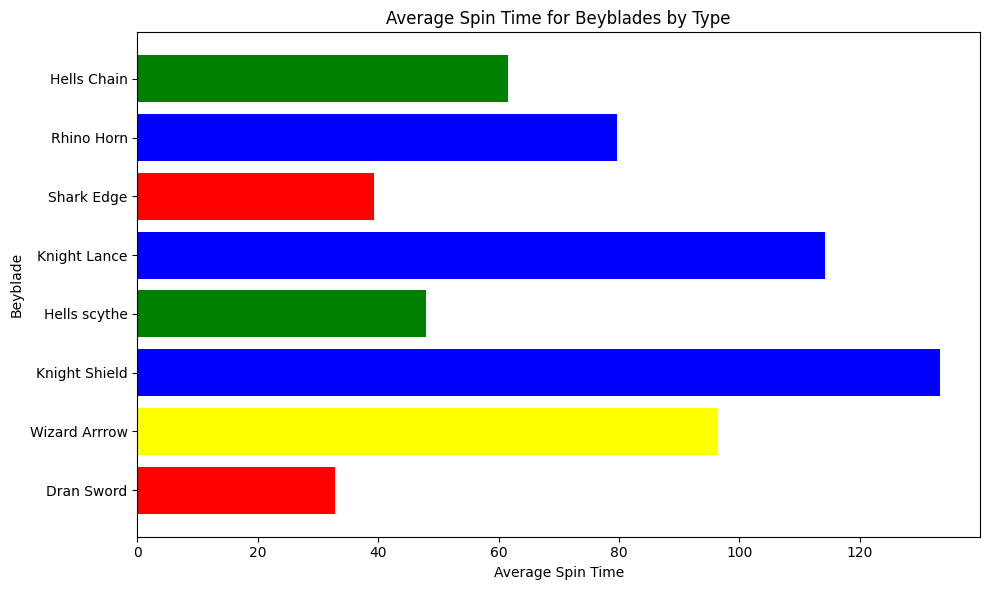

In [142]:

filtered_data = beyblade_data[beyblade_data['Solo Spin Time'].notnull() & (beyblade_data['Solo Spin Time'] != '')]

# Convert 'Solo Spin Time' to float for calculation
filtered_data['Average Spin Time'] = filtered_data['Solo Spin Time'].apply(lambda x: eval(x))

colors = []
for typ in filtered_data['Type']:
    if typ == 'Attack':
        colors.append('red')
    elif typ == 'Stamina':
        colors.append('yellow')
    elif typ == 'Defense':
        colors.append('blue')
    elif typ == 'Balance':
        colors.append('green')


plt.figure(figsize=(10, 6))
plt.barh(filtered_data['Blade'], filtered_data['Average Spin Time'], color=colors)
plt.xlabel('Average Spin Time')
plt.ylabel('Beyblade')
plt.title('Average Spin Time for Beyblades by Type')
plt.tight_layout()
plt.show()

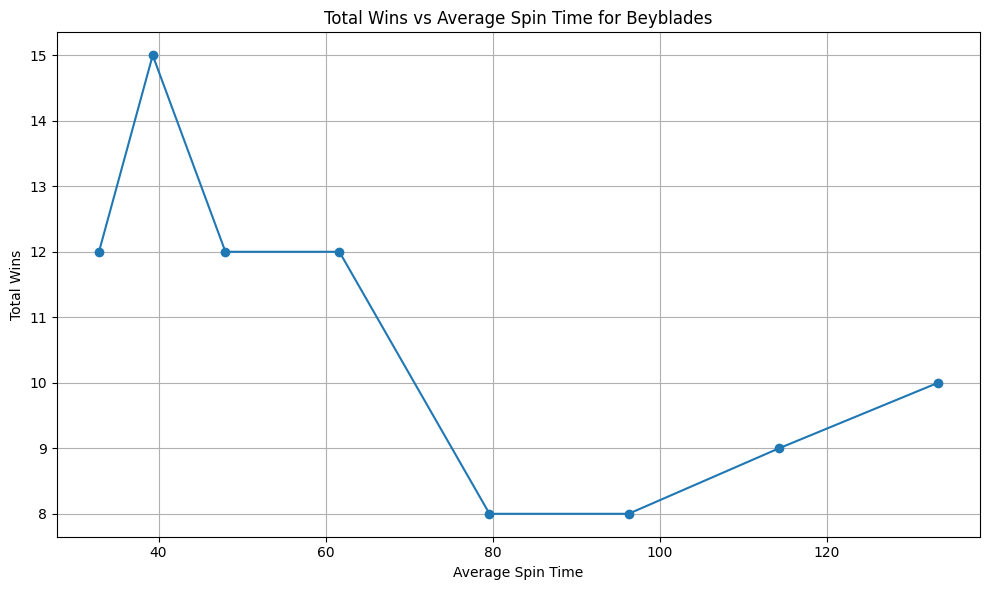

In [115]:
spin_filter = beyblade_data[(beyblade_data['Solo Spin Time'].notnull()) ]

# Convert 'Solo Spin Time' to float for calculation
spin_filter['Average Spin Time'] = spin_filter['Solo Spin Time'].apply(lambda x: eval(x))

# Sort the data by average spin time
sorted_spin_time = spin_filter.sort_values('Average Spin Time')

plt.figure(figsize=(10, 6))
plt.plot(sorted_spin_time['Average Spin Time'], sorted_spin_time['Total Wins'], marker='o', linestyle='-')
plt.xlabel('Average Spin Time')
plt.ylabel('Total Wins')
plt.title('Total Wins vs Average Spin Time for Beyblades')
plt.grid(True)
plt.tight_layout()
plt.show()

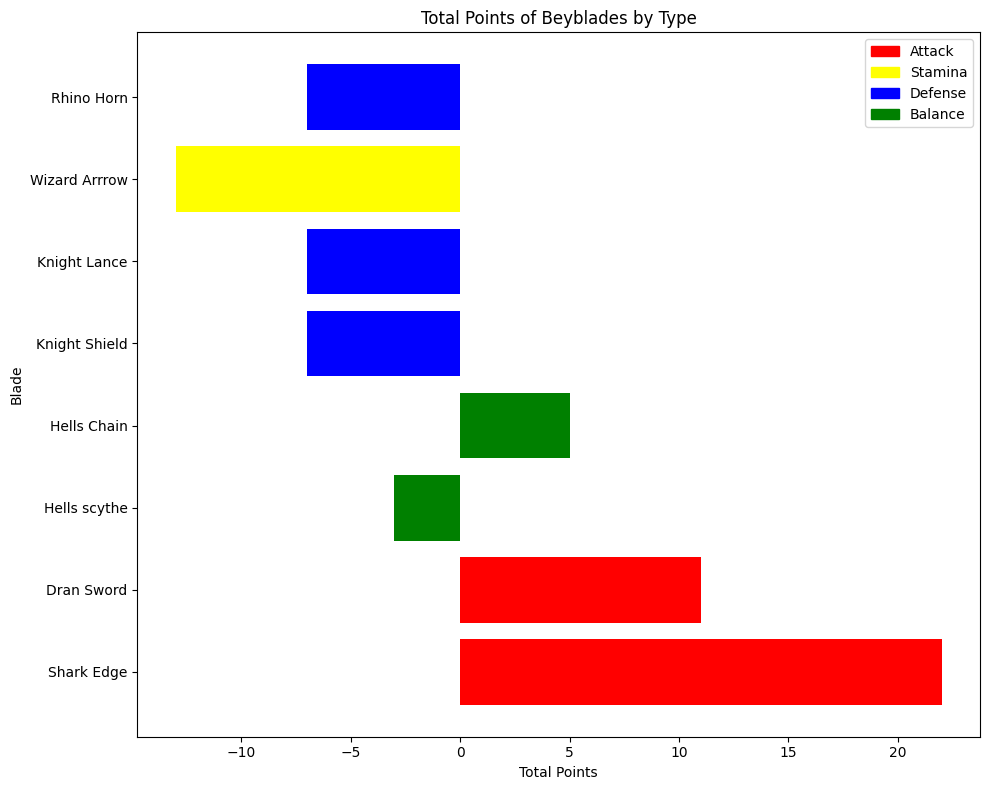

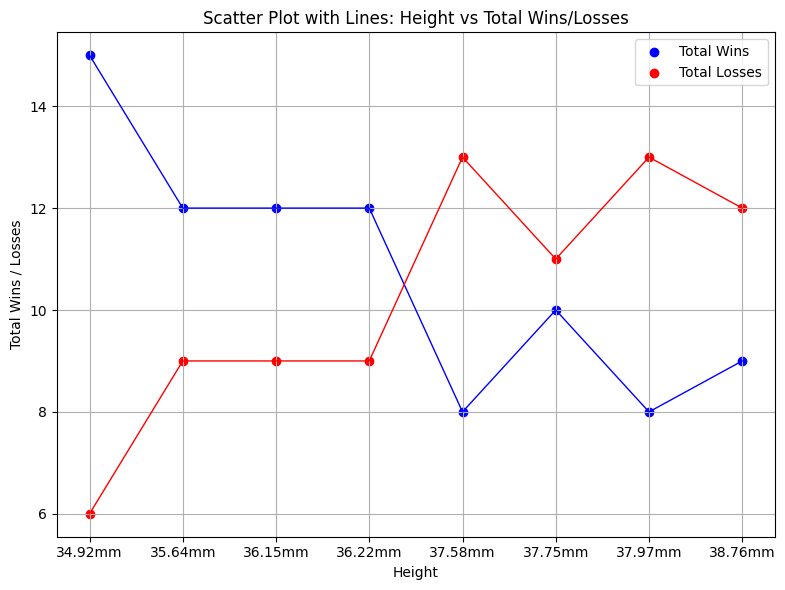

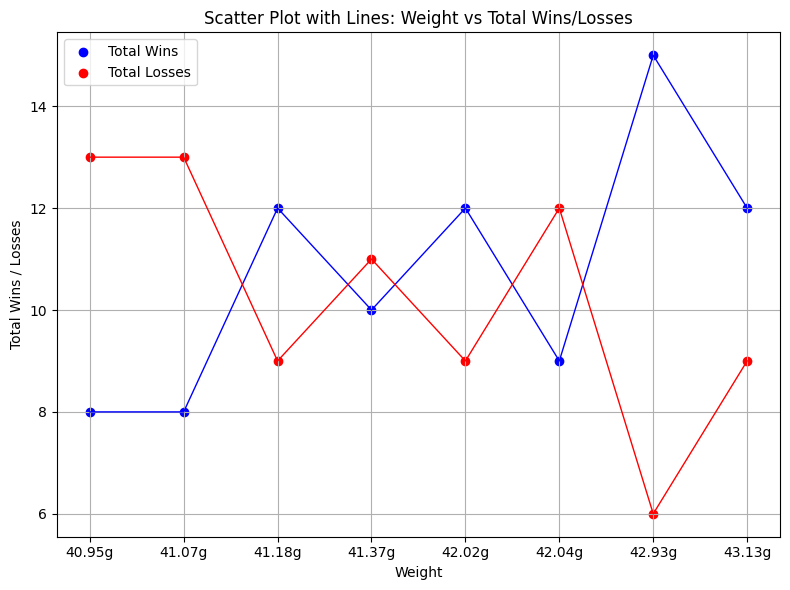

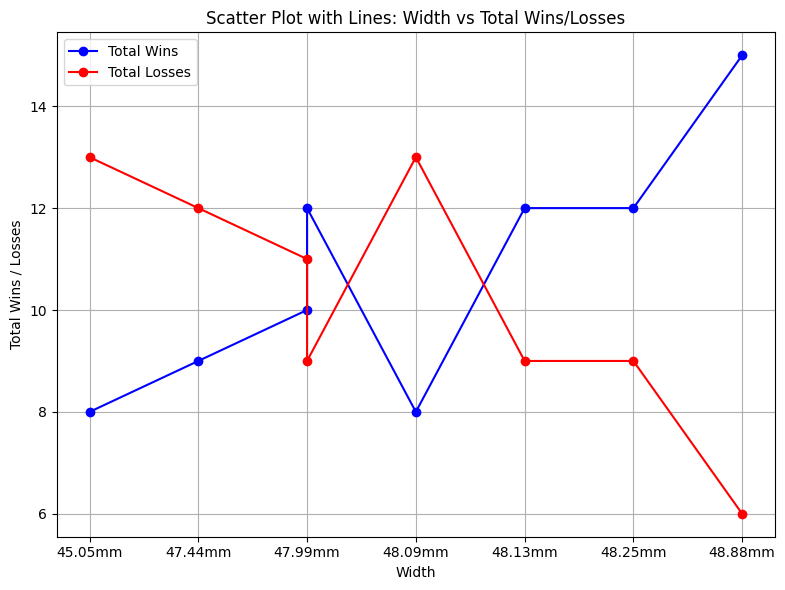

In [148]:
#total points plot
type_colors = {'Attack': 'red', 'Stamina': 'yellow', 'Defense': 'blue', 'Balance': 'green'}

# Create a color list based on 'Type' column
colors = [type_colors[type_val] for type_val in sorted_data['Type']]

# Create the bar plot with different colors for each type
plt.figure(figsize=(10, 8))
plt.barh(sorted_data['Blade'], sorted_data['Total Points'], color=colors)
plt.xlabel('Total Points')
plt.ylabel('Blade')
plt.title('Total Points of Beyblades by Type')
plt.tight_layout()
legend_handles = [plt.Rectangle((0,0),1,1, color=type_colors[type_val]) for type_val in type_colors]
plt.legend(legend_handles, type_colors.keys())
plt.show()
# Sort the data by ascending height
height_sorted = beyblade_data.sort_values('Height')

# Create a scatter plot for Height vs Total Wins and Total Losses
plt.figure(figsize=(8, 6))
plt.scatter(height_sorted['Height'], height_sorted['Total Wins'], marker='o', color='blue', label='Total Wins')
plt.scatter(height_sorted['Height'], height_sorted['Total Losses'], marker='o', color='red', label='Total Losses')
plt.plot(height_sorted['Height'], height_sorted['Total Wins'], linestyle='-', color='blue', linewidth=1)
plt.plot(height_sorted['Height'], height_sorted['Total Losses'], linestyle='-', color='red', linewidth=1)
plt.xlabel('Height')
plt.ylabel('Total Wins / Losses')
plt.title('Scatter Plot with Lines: Height vs Total Wins/Losses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Sort the data by ascending weight
weight_sorted = beyblade_data.sort_values('Weight')

# Create a scatter plot for Weight vs Total Wins and Total Losses
plt.figure(figsize=(8, 6))
plt.scatter(weight_sorted['Weight'], weight_sorted['Total Wins'], marker='o', color='blue', label='Total Wins')
plt.scatter(weight_sorted['Weight'], weight_sorted['Total Losses'], marker='o', color='red', label='Total Losses')
plt.plot(weight_sorted['Weight'], weight_sorted['Total Wins'], linestyle='-', color='blue', linewidth=1)
plt.plot(weight_sorted['Weight'], weight_sorted['Total Losses'], linestyle='-', color='red', linewidth=1)
plt.xlabel('Weight')
plt.ylabel('Total Wins / Losses')
plt.title('Scatter Plot with Lines: Weight vs Total Wins/Losses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Sort the data by ascending width
sorted_width = beyblade_data.sort_values('Width')

# Create a line plot for Width vs Total Wins and Total Losses
plt.figure(figsize=(8, 6))
plt.plot(sorted_width['Width'], sorted_width['Total Wins'], marker='o', color='blue', label='Total Wins')
plt.plot(sorted_width['Width'], sorted_width['Total Losses'], marker='o', color='red', label='Total Losses')
plt.xlabel('Width')
plt.ylabel('Total Wins / Losses')
plt.title('Scatter Plot with Lines: Width vs Total Wins/Losses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

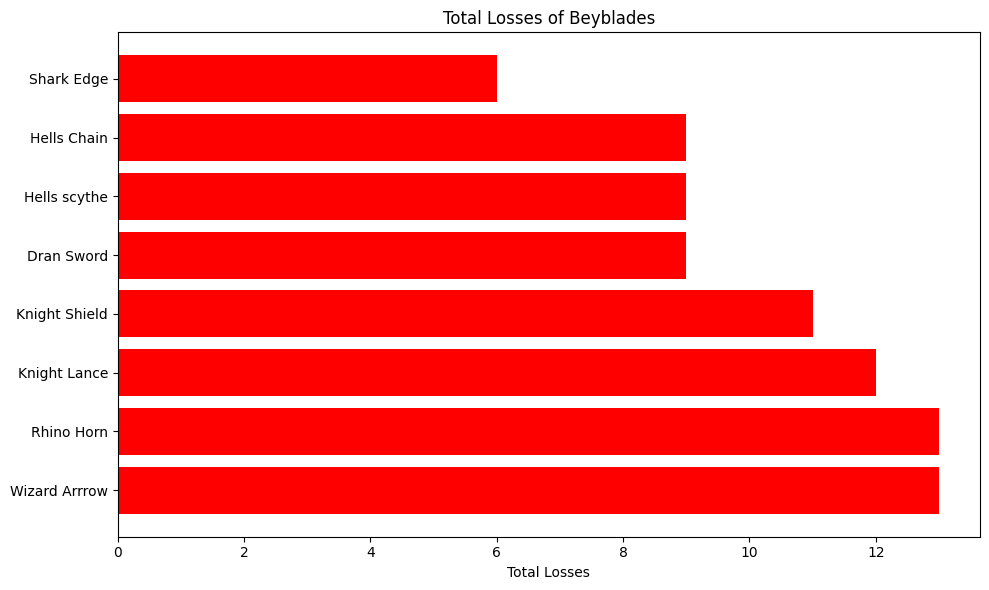

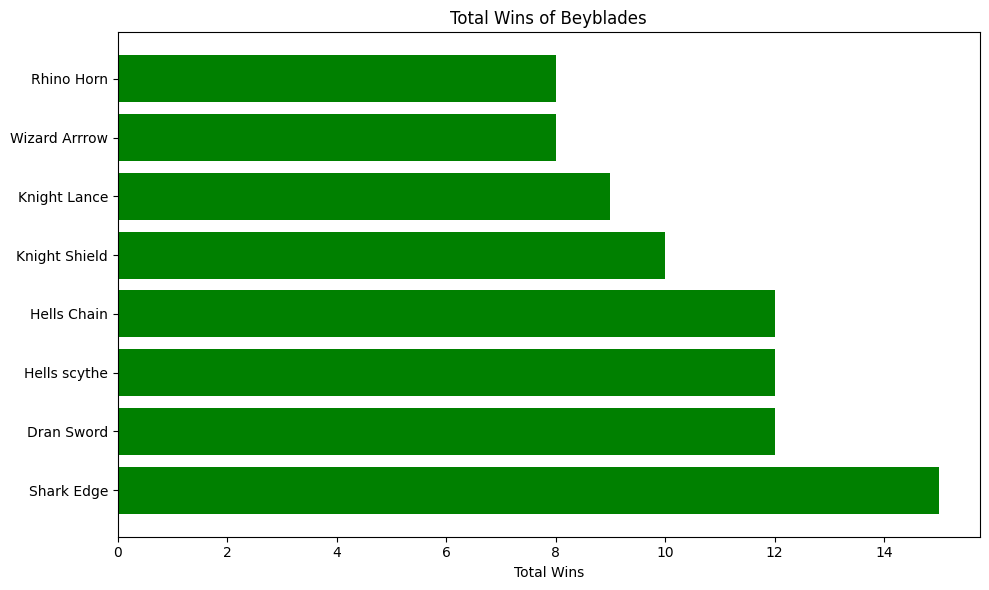

In [101]:
filtered_data = beyblade_data[~beyblade_data['Total Wins'].isnull() & ~beyblade_data['Total Losses'].isnull()]

# Sort data by total losses and total wins
sorted_data_losses = filtered_data.sort_values('Total Losses', ascending=False)
sorted_data_wins = filtered_data.sort_values('Total Wins', ascending=False)

# Create horizontal bar plot for total losses
plt.figure(figsize=(10, 6))
plt.barh(sorted_data_losses['Blade'], sorted_data_losses['Total Losses'], color='red')
plt.xlabel('Total Losses')
plt.title('Total Losses of Beyblades')
plt.tight_layout()
plt.show()

# Create horizontal bar plot for total wins
plt.figure(figsize=(10, 6))
plt.barh(sorted_data_wins['Blade'], sorted_data_wins['Total Wins'], color='green')
plt.xlabel('Total Wins')
plt.title('Total Wins of Beyblades')
plt.tight_layout()
plt.show()


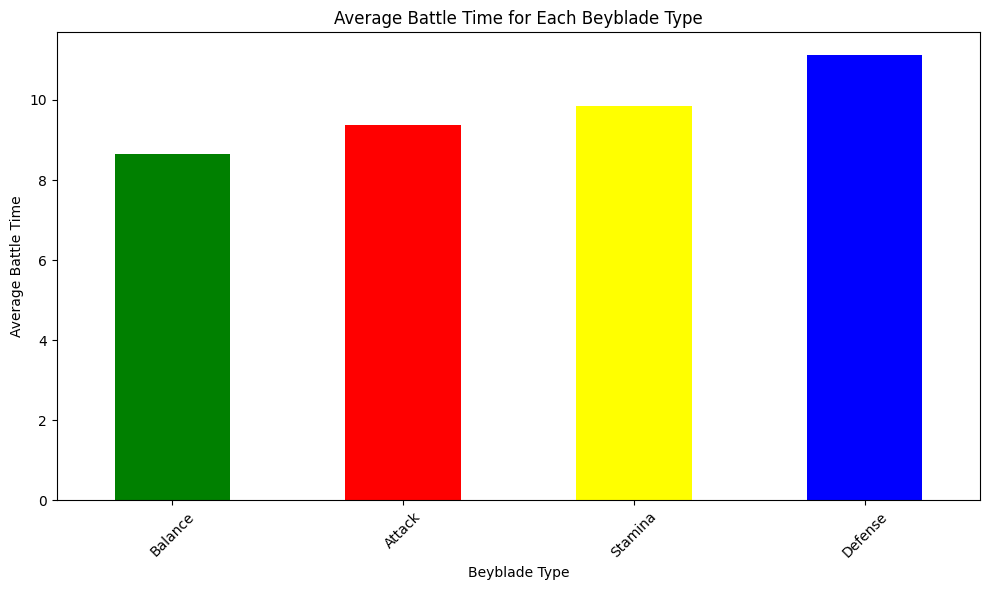

In [146]:
avg_battle_time_by_type = beyblade_data.groupby('Type')['Average Battle Time'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_battle_time_by_type.plot(kind='bar', color=[type_colors[type_val] for type_val in avg_battle_time_by_type.index])
plt.xlabel('Beyblade Type')
plt.ylabel('Average Battle Time')
plt.title('Average Battle Time for Each Beyblade Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()